In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [3]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 36:
        return '13-36 months'
    else:
        return '37+ months'

df['tenure_group'] = df['tenure'].apply(tenure_group)


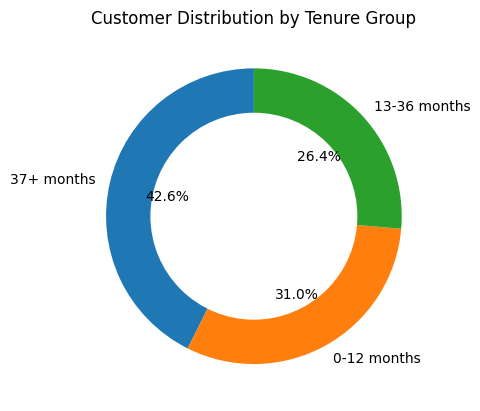

In [4]:
tenure_counts = df['tenure_group'].value_counts()
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Customer Distribution by Tenure Group')
plt.show()


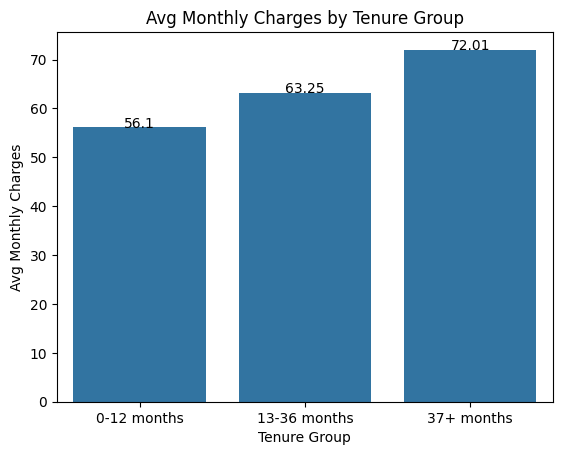

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_charges = df.groupby('tenure_group')['monthlycharges'].mean().reset_index()

sns.barplot(data=avg_charges, x='tenure_group', y='monthlycharges')
for index, row in avg_charges.iterrows():
    plt.text(index, row.monthlycharges, round(row.monthlycharges,2), color='black', ha="center")

plt.title('Avg Monthly Charges by Tenure Group')
plt.ylabel('Avg Monthly Charges')
plt.xlabel('Tenure Group')
plt.show()
